#### Import necessary libraries

In [1]:
import pandas as pd
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=xw.load()

In [3]:
df=df.reset_index()

In [4]:
df.describe()

,Amount,Units
count,300.000000,300.000000
mean,4136.230000,152.200000
std,3124.832629,118.099499
min,0.000000,0.000000
25%,1652.000000,54.000000
50%,3437.000000,124.500000
75%,6179.250000,220.500000
max,16184.000000,525.000000


#### Sales by Country

In [5]:
df.groupby('Geography')[['Amount']].sum().sort_values(by='Amount', ascending=False)

,Amount
Geography,
India,252469.0
Canada,237944.0
New Zealand,218813.0
USA,189434.0
UK,173530.0
Australia,168679.0


#### Top 5 products by dollar per unit

In [6]:
df1=df.groupby('Product')[['Amount', 'Units']].sum()
df1=df1.reset_index()

In [7]:
# Creating a column
df1['dollar per unit']=df1['Amount']/df1['Units']

In [8]:
df1[['Product','dollar per unit']].sort_values(by='dollar per unit', ascending=False).head()

,Product,dollar per unit
18,Raspberry Choco,44.990868
17,Peanut Butter Cubes,37.303128
2,85% Dark Bars,33.886973
6,Baker's Choco Chips,32.807190
4,After Nines,32.301657


#### Are there any anomalies in the data?

<AxesSubplot:title={'center':'Amount'}, xlabel='Geography'>

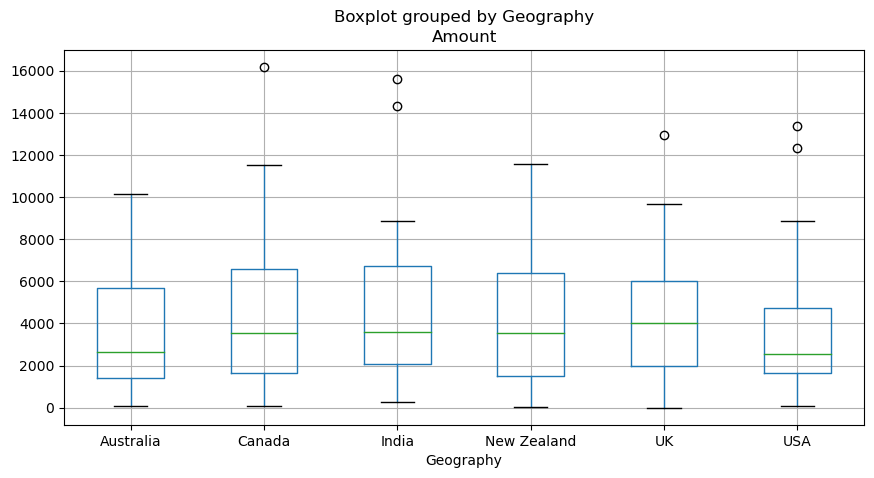

In [10]:
df.boxplot(column='Amount', by='Geography', figsize=(10,5))

#### Best Sales person by country

In [18]:
df2=df.groupby(['Geography','Sales Person'])[['Amount']].sum()

In [22]:
df2 = df2.reset_index().sort_values(by='Amount', ascending=False)

In [28]:
df2.drop_duplicates(subset='Geography', keep='first')

,index,Geography,Sales Person,Amount
40,40,UK,Barr Faughny,45752.0
33,33,New Zealand,Ches Bonnell,43568.0
25,25,India,Gigi Bohling,41559.0
15,15,Canada,Gigi Bohling,39620.0
59,59,USA,Ram Mahesh,38325.0
5,5,Australia,Gigi Bohling,25221.0


#### Profits by product (using products table) 

In [35]:
cost = xw.load().reset_index()

In [37]:
merged_df=pd.merge(df1, cost)

In [39]:
merged_df['CostUnitsSold']=merged_df['Units']*merged_df['Cost per unit']

In [42]:
profit = merged_df[['Product','Amount','CostUnitsSold']]

In [44]:
profit['Profit']=profit['Amount']-profit['CostUnitsSold']

C:\Users\ladyb\AppData\Local\Temp\ipykernel_10488\3059328010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['Profit']=profit['Amount']-profit['CostUnitsSold']


In [51]:
profit.head()

,Product,Amount,CostUnitsSold,Profit
0,50% Dark Bites,43183.0,23657.40,19525.60
1,70% Dark Bites,66500.0,40600.98,25899.02
2,85% Dark Bars,35378.0,5188.68,30189.32
3,99% Dark & Pure,44744.0,14943.84,29800.16
4,After Nines,66283.0,20048.04,46234.96


In [50]:
# Top 5 Profitable Products
display(profit.sort_values(by='Profit', ascending=False).head())
print('Top 5 Profitable Products')

# Bottom 5 less-Profitable Products
display(profit.sort_values(by='Profit', ascending=False).tail())
print('Bottom 5 less-Profitable Products')

,Product,Amount,CostUnitsSold,Profit
6,Baker's Choco Chips,70273.0,11995.20,58277.80
10,Eclairs,63721.0,7249.41,56471.59
8,Choco Coated Almonds,71967.0,19903.65,52063.35
18,Raspberry Choco,68971.0,17982.09,50988.91
4,After Nines,66283.0,20048.04,46234.96


Top 5 Profitable Products


,Product,Amount,CostUnitsSold,Profit
20,Spicy Special Slims,37772.0,11772.00,26000.00
1,70% Dark Bites,66500.0,40600.98,25899.02
16,Organic Choco Syrup,69461.0,49888.86,19572.14
0,50% Dark Bites,43183.0,23657.40,19525.60
5,Almond Choco,33551.0,18604.08,14946.92


Bottom 5 less-Profitable Products


In [ ]:
merged_df['CostUnitsSold']=merged_df['Units']*merged_df['Cost per unit']

In [55]:
# Which products to discontinue?

mdf=pd.merge(df1, cost)
mdf['CostUnitsSold']=mdf['Units']*mdf['Cost per unit']
mdf['Profit']=mdf['Amount']-mdf['CostUnitsSold']

In [56]:
mdf

,Product,Amount,Units,dollar per unit,Cost per unit,CostUnitsSold,Profit
0,50% Dark Bites,43183.0,2022.0,21.356578,11.70,23657.40,19525.60
1,70% Dark Bites,66500.0,2802.0,23.733048,14.49,40600.98,25899.02
2,85% Dark Bars,35378.0,1044.0,33.886973,4.97,5188.68,30189.32
3,99% Dark & Pure,44744.0,1956.0,22.875256,7.64,14943.84,29800.16
4,After Nines,66283.0,2052.0,32.301657,9.77,20048.04,46234.96
5,Almond Choco,33551.0,1566.0,21.424649,11.88,18604.08,14946.92
6,Baker's Choco Chips,70273.0,2142.0,32.807190,5.60,11995.20,58277.80
7,Caramel Stuffed Bars,72373.0,3207.0,22.567197,10.38,33288.66,39084.34
8,Choco Coated Almonds,71967.0,2301.0,31.276402,8.65,19903.65,52063.35
9,Drinking Coco,52150.0,1752.0,29.765982,6.47,11335.44,40814.56


<AxesSubplot:xlabel='Product'>

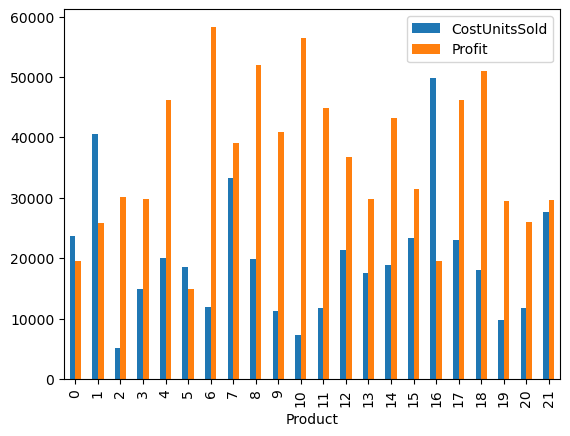

In [61]:
mdf[['CostUnitsSold','Profit']].plot(kind='bar', xlabel='Product')

Per my observation Organic choco syrup should be discountinued because in comparison between capital and profit made, implies that a lot of money is used just to make a small amount of profit.

#### Dynamic country-level Sales Report

In [64]:
country = df.groupby(['Geography','Sales Person','Product'])[['Amount','Units']].sum()

In [74]:
country = country.reset_index()

In [84]:
country.loc[country['Geography'] =='Australia']

,Geography,Sales Person,Product,Amount,Units
0,Australia,Barr Faughny,Almond Choco,3549.0,3.0
1,Australia,Barr Faughny,Caramel Stuffed Bars,6580.0,183.0
2,Australia,Barr Faughny,Fruit & Nut Bars,4417.0,153.0
3,Australia,Barr Faughny,Milk Bars,56.0,51.0
4,Australia,Barr Faughny,Smooth Sliky Salty,4326.0,348.0
5,Australia,Brien Boise,After Nines,168.0,84.0
6,Australia,Brien Boise,Choco Coated Almonds,3752.0,213.0
7,Australia,Brien Boise,Fruit & Nut Bars,1701.0,234.0
8,Australia,Brien Boise,Milk Bars,819.0,510.0
9,Australia,Brien Boise,Organic Choco Syrup,2268.0,63.0


In [85]:
country.loc[country['Geography'] =='India']

,Geography,Sales Person,Product,Amount,Units
96,India,Barr Faughny,99% Dark & Pure,7511.0,120.0
97,India,Barr Faughny,Milk Bars,252.0,54.0
98,India,Brien Boise,Mint Chip Choco,2009.0,219.0
99,India,Brien Boise,Smooth Sliky Salty,3507.0,288.0
100,India,Carla Molina,After Nines,336.0,144.0
101,India,Carla Molina,Eclairs,1463.0,39.0
102,India,Carla Molina,Fruit & Nut Bars,4935.0,126.0
103,India,Carla Molina,Mint Chip Choco,1274.0,225.0
104,India,Carla Molina,Peanut Butter Cubes,7847.0,174.0
105,India,Ches Bonnell,50% Dark Bites,1932.0,369.0


In [86]:
country.loc[country['Geography'] =='Canada']

,Geography,Sales Person,Product,Amount,Units
46,Canada,Barr Faughny,Eclairs,189.0,48.0
47,Canada,Barr Faughny,Manuka Honey Choco,8211.0,75.0
48,Canada,Barr Faughny,Mint Chip Choco,11417.0,21.0
49,Canada,Barr Faughny,Organic Choco Syrup,798.0,519.0
50,Canada,Barr Faughny,Smooth Sliky Salty,3094.0,246.0
51,Canada,Brien Boise,Fruit & Nut Bars,5019.0,150.0
52,Canada,Carla Molina,70% Dark Bites,6118.0,174.0
53,Canada,Carla Molina,99% Dark & Pure,1925.0,192.0
54,Canada,Carla Molina,Baker's Choco Chips,98.0,204.0
55,Canada,Carla Molina,Caramel Stuffed Bars,854.0,309.0


In [87]:
country.loc[country['Geography'] =='New Zealand']

,Geography,Sales Person,Product,Amount,Units
154,New Zealand,Barr Faughny,50% Dark Bites,1057.0,54.0
155,New Zealand,Barr Faughny,99% Dark & Pure,238.0,18.0
156,New Zealand,Barr Faughny,Drinking Coco,11571.0,138.0
157,New Zealand,Barr Faughny,Eclairs,9926.0,201.0
158,New Zealand,Barr Faughny,Raspberry Choco,2863.0,42.0
159,New Zealand,Brien Boise,70% Dark Bites,42.0,150.0
160,New Zealand,Brien Boise,99% Dark & Pure,1771.0,204.0
161,New Zealand,Brien Boise,After Nines,1890.0,195.0
162,New Zealand,Brien Boise,Baker's Choco Chips,6279.0,45.0
163,New Zealand,Brien Boise,Raspberry Choco,9709.0,30.0


In [88]:
country.loc[country['Geography'] =='USA']

,Geography,Sales Person,Product,Amount,Units
247,USA,Barr Faughny,99% Dark & Pure,553.0,15.0
248,USA,Barr Faughny,Eclairs,1589.0,303.0
249,USA,Brien Boise,70% Dark Bites,3598.0,81.0
250,USA,Brien Boise,After Nines,5012.0,210.0
251,USA,Brien Boise,Choco Coated Almonds,6706.0,459.0
252,USA,Brien Boise,Manuka Honey Choco,2023.0,168.0
253,USA,Brien Boise,Orange Choco,2702.0,363.0
254,USA,Brien Boise,Organic Choco Syrup,4753.0,300.0
255,USA,Brien Boise,Peanut Butter Cubes,357.0,126.0
256,USA,Carla Molina,99% Dark & Pure,609.0,99.0


In [89]:
country.loc[country['Geography'] =='UK']

,Geography,Sales Person,Product,Amount,Units
207,UK,Barr Faughny,After Nines,1568.0,141.0
208,UK,Barr Faughny,Caramel Stuffed Bars,6027.0,144.0
209,UK,Barr Faughny,Fruit & Nut Bars,630.0,36.0
210,UK,Barr Faughny,Mint Chip Choco,2016.0,117.0
211,UK,Barr Faughny,Orange Choco,9443.0,162.0
212,UK,Barr Faughny,Organic Choco Syrup,7812.0,81.0
213,UK,Barr Faughny,Peanut Butter Cubes,4018.0,126.0
214,UK,Barr Faughny,Raspberry Choco,4802.0,36.0
215,UK,Barr Faughny,Spicy Special Slims,7651.0,213.0
216,UK,Barr Faughny,White Choc,1785.0,462.0
